# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on= 'Mouse ID', how= 'right')

# Display the data table for preview
merged_df.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     b128    Capomulin  Female           9          22          0   
1     f932     Ketapril    Male          15          29          0   
2     g107     Ketapril  Female           2          29          0   
3     a457     Ketapril  Female          11          30          0   
4     c819     Ketapril    Male          21          25          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0  
1                45.0                 0  
2                45.0                 0  
3                45.0                 0  
4                45.0                 0

In [11]:
# Checking the number of mice.
len(merged_df['Mouse ID'].value_counts())

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merged_df.loc[merged_df.duplicated(subset= ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = merged_df.loc[merged_df['Mouse ID'] == "g989", :]
dup_mouse_data

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
107      g989     Propriva  Female          21          26          0   
137      g989     Propriva  Female          21          26          0   
329      g989     Propriva  Female          21          26          5   
360      g989     Propriva  Female          21          26          5   
620      g989     Propriva  Female          21          26         10   
681      g989     Propriva  Female          21          26         10   
815      g989     Propriva  Female          21          26         15   
869      g989     Propriva  Female          21          26         15   
950      g989     Propriva  Female          21          26         20   
1111     g989     Propriva  Female          21          26         20   
1195     g989     Propriva  Female          21          26         25   
1380     g989     Propriva  Female          21          26         30   
1592     g989     Propriva  Female          21          26         35   

      Tumor Volume (mm3)  Metastatic Sites  
107            45.000000                 0  
137            45.000000                 0  
329            48.786801                 0  
360            47.570392                 0  
620            51.745156                 0  
681            49.880528                 0  
815            51.325852                 1  
869            53.442020                 0  
950            55.326122                 1  
1111           54.657650                 1  
1195           56.045564                 1  
1380           59.082294                 1  
1592           62.570880                 2

In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its I
merged_index = merged_df.set_index(['Mouse ID'])
#merged_index
#merged_index.drop(merged_index[(merged_index[] == 'g989')].index, inplace= True)
cleaned_df = merged_index.drop(index= ('g989'))                                  
#cleaned_df = merged_index.drop(merged_index['g989'], axis= 0, inplace= True)
cleaned_df
#= merged_index.loc(['Mouse ID'] == 'g989')

Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                           
b128        Capomulin  Female           9          22          0   
f932         Ketapril    Male          15          29          0   
g107         Ketapril  Female           2          29          0   
a457         Ketapril  Female          11          30          0   
c819         Ketapril    Male          21          25          0   
...               ...     ...         ...         ...        ...   
r944        Capomulin    Male          12          25         45   
u364        Capomulin    Male          18          17         45   
p438         Ceftamin  Female          11          26         45   
x773          Placebo  Female          21          30         45   
b879         Stelasyn  Female           4          26         45   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
b128               45.000000                 0  
f932               45.000000                 0  
g107               45.000000                 0  
a457               45.000000                 0  
c819               45.000000                 0  
...                      ...               ...  
r944               41.581521                 2  
u364               31.023923                 3  
p438               61.433892                 1  
x773               58.634971                 4  
b879               72.555239                 2  

[1880 rows x 7 columns]

In [15]:
# Checking the number of mice in the clean DataFrame
#reset = cleaned_df.reset_index(inplace = True)
cleaned_df['Mouse ID'] = cleaned_df.index

len(cleaned_df['Mouse ID'].value_counts())
#cleaned_df.reset_index()
#print(reset)

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
variance = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
stdev = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
SEM = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

summary_statistics = pd.DataFrame({'Mean Tumor Volume': mean,
                                  'Median Tumor Volume': median,
                                  'Tumor Volume Variance': variance,
                                  'Tumor Volume Std. Dev.': stdev,
                                  'Tumor Volum Std. Err.': SEM})
summary_statistics

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volum Std. Err.  
Drug Regimen                                                 
Capomulin                   4.994774               0.329346  
Ceftamin                    6.268188               0.469821  
Infubinol                   6.567243               0.492236  
Ketapril                    8.279709               0.603860  
Naftisol                    8.134708               0.596466  
Placebo                     7.821003               0.581331  
Propriva                    6.622085               0.544332  
Ramicane                    4.846308               0.320955  
Stelasyn                    7.710419               0.573111  
Zoniferol                   6.966589               0.516398

In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
sum_stat_agg = cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
sum_stat_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [18]:
sum_stat_data = cleaned_df['Drug Regimen'].value_counts()
sum_stat_data


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

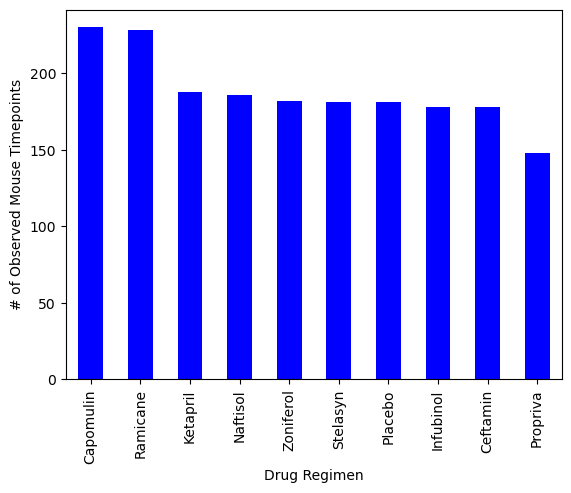

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
sum_stat_data.plot.bar(color= 'blue', xlabel= 'Drug Regimen', ylabel= '# of Observed Mouse Timepoints')


In [20]:
new_df = sum_stat_data.rename_axis('Drug Regimen').reset_index(name= 'counts')
new_df
x_axis = new_df['Drug Regimen']
y_axis = new_df['counts']

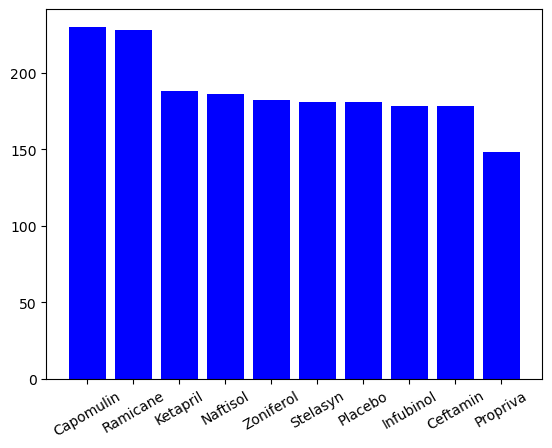

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x_axis, y_axis, color= 'blue')
plt.xticks(rotation= 30)
plt.show()

In [22]:
cleaned_df['Sex'].value_counts()



Male      958
Female    922
Name: Sex, dtype: int64

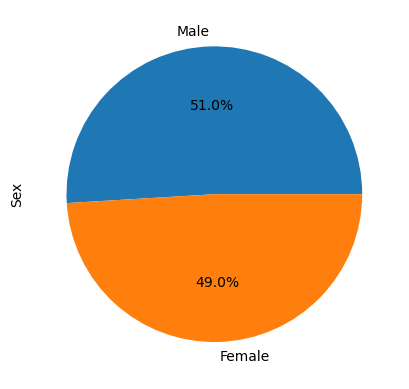

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_df["Sex"].value_counts().plot.pie(autopct= "%1.1f%%")
plt.show()

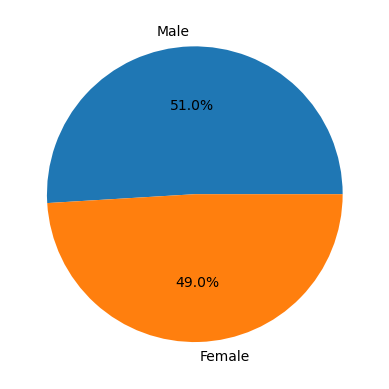

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
amount = [958, 922]
plt.pie(amount, labels= labels, autopct= '%1.1f%%')
plt.show()

In [27]:
#cleaned_data_df = cleaned_df({'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 
                     #         'Metastatic Sites'})
#cleaned_data_df
cleaned_two = cleaned_df.rename(columns= {'Mouse ID': 'Mouse ID 2'}, inplace= True)
#cleaned_two

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_data = capomulin_df.groupby(["Mouse ID"]).max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_data)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_capo = pd.merge(capomulin_vol, cleaned_df, on=("Mouse ID", 'Timepoint'), how='left')
merged_capo

Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
Mouse ID                                                           
b128             45    Capomulin  Female           9          22   
b742             45    Capomulin    Male           7          21   
f966             20    Capomulin    Male          16          17   
g288             45    Capomulin    Male           3          19   
g316             45    Capomulin  Female          22          22   
i557             45    Capomulin  Female           1          24   
i738             45    Capomulin  Female          23          20   
j119             45    Capomulin  Female           7          23   
j246             35    Capomulin  Female          21          21   
l509             45    Capomulin    Male          17          21   
l897             45    Capomulin    Male          17          19   
m601             45    Capomulin    Male          22          17   
m957             45    Capomulin  Female           3          19   
r157             15    Capomulin    Male          22          25   
r554             45    Capomulin  Female           8          17   
r944             45    Capomulin    Male          12          25   
s185             45    Capomulin  Female           3          17   
s710             45    Capomulin  Female           1          23   
t565             45    Capomulin  Female          20          17   
u364             45    Capomulin    Male          18          17   
v923             45    Capomulin  Female          19          21   
w150             10    Capomulin    Male          23          23   
w914             45    Capomulin    Male          24          21   
x401             45    Capomulin  Female          16          15   
y793             45    Capomulin    Male          17          17   

          Tumor Volume (mm3)  Metastatic Sites Mouse ID 2  
Mouse ID                                                   
b128               38.982878                 2       b128  
b742               38.939633                 0       b742  
f966               30.485985                 0       f966  
g288               37.074024                 1       g288  
g316               40.159220                 2       g316  
i557               47.685963                 1       i557  
i738               37.311846                 2       i738  
j119               38.125164                 1       j119  
j246               38.753265                 1       j246  
l509               41.483008                 3       l509  
l897               38.846876                 1       l897  
m601               28.430964                 1       m601  
m957               33.329098                 1       m957  
r157               46.539206                 0       r157  
r554               32.377357                 3       r554  
r944               41.581521                 2       r944  
s185               23.343598                 1       s185  
s710               40.728578                 1       s710  
t565               34.455298                 0       t565  
u364               31.023923                 3       u364  
v923               40.658124                 2       v923  
w150               39.952347                 0       w150  
w914               36.041047                 2       w914  
x401               28.484033                 0       x401  
y793               31.896238                 2       y793

In [29]:
# Start by getting the last (greatest) timepoint for each mouse
ramicane_data = ramicane_df.groupby(["Mouse ID"]).max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_data)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_rami = pd.merge(ramicane_vol, cleaned_df, on=("Mouse ID", 'Timepoint'), how='left')
merged_rami

Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
Mouse ID                                                           
a411             45     Ramicane    Male           3          22   
a444             45     Ramicane  Female          10          25   
a520             45     Ramicane    Male          13          21   
a644             45     Ramicane  Female           7          17   
c458             30     Ramicane  Female          23          20   
c758             45     Ramicane    Male           9          17   
d251             45     Ramicane  Female           8          19   
e662             45     Ramicane    Male           8          24   
g791             45     Ramicane    Male          11          16   
i177             45     Ramicane    Male          10          18   
i334             45     Ramicane  Female           8          20   
j913             45     Ramicane  Female           4          17   
j989             45     Ramicane    Male           8          19   
k403             45     Ramicane    Male          21          16   
m546             45     Ramicane    Male          18          16   
n364             45     Ramicane    Male           4          17   
q597             45     Ramicane    Male          20          25   
q610             35     Ramicane  Female          18          21   
r811             45     Ramicane    Male           9          19   
r921             30     Ramicane  Female           5          25   
s508             45     Ramicane    Male           1          17   
u196             45     Ramicane    Male          18          25   
w678              5     Ramicane  Female           5          24   
y449             15     Ramicane    Male          19          24   
z578             45     Ramicane    Male          11          16   

          Tumor Volume (mm3)  Metastatic Sites Mouse ID 2  
Mouse ID                                                   
a411               38.407618                 1       a411  
a444               43.047543                 0       a444  
a520               38.810366                 1       a520  
a644               32.978522                 1       a644  
c458               38.342008                 2       c458  
c758               33.397653                 1       c758  
d251               37.311236                 2       d251  
e662               40.659006                 2       e662  
g791               29.128472                 1       g791  
i177               33.562402                 3       i177  
i334               36.374510                 2       i334  
j913               31.560470                 1       j913  
j989               36.134852                 1       j989  
k403               22.050126                 1       k403  
m546               30.564625                 1       m546  
n364               31.095335                 1       n364  
q597               45.220869                 2       q597  
q610               36.561652                 2       q610  
r811               37.225650                 1       r811  
r921               43.419381                 1       r921  
s508               30.276232                 0       s508  
u196               40.667713                 3       u196  
w678               43.166373                 0       w678  
y449               44.183451                 0       y449  
z578               30.638696                 0       z578

In [30]:
# Start by getting the last (greatest) timepoint for each mouse
infubinol_data = infubinol_df.groupby(["Mouse ID"]).max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_data)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_infub = pd.merge(infubinol_vol, cleaned_df, on=("Mouse ID", 'Timepoint'), how='left')
merged_infub

Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
Mouse ID                                                           
a203             45    Infubinol  Female          20          23   
a251             45    Infubinol  Female          21          25   
a577             30    Infubinol  Female           6          25   
a685             45    Infubinol    Male           8          30   
c139             45    Infubinol    Male          11          28   
c326              5    Infubinol  Female          18          25   
c895             30    Infubinol  Female           7          29   
e476             45    Infubinol    Male          23          26   
f345             45    Infubinol    Male          23          26   
i386             40    Infubinol  Female          23          29   
k483             45    Infubinol  Female          20          30   
k804             35    Infubinol  Female          23          29   
m756              5    Infubinol    Male          19          30   
n671             30    Infubinol    Male          18          25   
o809             35    Infubinol    Male           3          25   
o813              5    Infubinol    Male          24          28   
q132             30    Infubinol  Female           1          30   
s121             25    Infubinol    Male          23          26   
v339              5    Infubinol    Male          20          26   
v719             20    Infubinol  Female          17          30   
v766             15    Infubinol    Male          16          27   
w193             20    Infubinol    Male          22          30   
w584             30    Infubinol    Male           3          29   
y163             45    Infubinol  Female          17          27   
z581             45    Infubinol  Female          24          25   

          Tumor Volume (mm3)  Metastatic Sites Mouse ID 2  
Mouse ID                                                   
a203               67.973419                 2       a203  
a251               65.525743                 1       a251  
a577               57.031862                 2       a577  
a685               66.083066                 3       a685  
c139               72.226731                 2       c139  
c326               36.321346                 0       c326  
c895               60.969711                 2       c895  
e476               62.435404                 1       e476  
f345               60.918767                 1       f345  
i386               67.289621                 4       i386  
k483               66.196912                 3       k483  
k804               62.117279                 2       k804  
m756               47.010364                 1       m756  
n671               60.165180                 0       n671  
o809               55.629428                 1       o809  
o813               45.699331                 0       o813  
q132               54.656549                 4       q132  
s121               55.650681                 2       s121  
v339               46.250112                 0       v339  
v719               54.048608                 1       v719  
v766               51.542431                 1       v766  
w193               50.005138                 0       w193  
w584               58.268442                 1       w584  
y163               67.685569                 3       y163  
z581               62.754451                 3       z581

In [31]:
# Start by getting the last (greatest) timepoint for each mouse
ceftamin_data = ceftamin_df.groupby("Mouse ID").max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_data)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_ceft = pd.merge(ceftamin_vol, cleaned_df, on=("Mouse ID", 'Timepoint'), how='left')
merged_ceft

Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
Mouse ID                                                           
a275             45     Ceftamin  Female          20          28   
b447              0     Ceftamin    Male           2          30   
b487             25     Ceftamin  Female           6          28   
b759             30     Ceftamin  Female          12          25   
f436             15     Ceftamin  Female           3          25   
h531              5     Ceftamin    Male           5          27   
j296             45     Ceftamin  Female          24          30   
k210             45     Ceftamin    Male          15          28   
l471             45     Ceftamin  Female           7          28   
l490             30     Ceftamin    Male          24          26   
l558             10     Ceftamin  Female          13          30   
l661             45     Ceftamin    Male          18          26   
l733             45     Ceftamin  Female           4          30   
o287             45     Ceftamin    Male           2          28   
p438             45     Ceftamin  Female          11          26   
q483             40     Ceftamin    Male           6          26   
t573              0     Ceftamin  Female          15          27   
u149             25     Ceftamin    Male          24          29   
u153              0     Ceftamin  Female          11          25   
w151             45     Ceftamin    Male          24          25   
x226              0     Ceftamin    Male          23          28   
x581             45     Ceftamin  Female          19          28   
x822             45     Ceftamin    Male           3          29   
y769             45     Ceftamin  Female           6          27   
y865             45     Ceftamin    Male          23          26   

          Tumor Volume (mm3)  Metastatic Sites Mouse ID 2  
Mouse ID                                                   
a275               62.999356                 3       a275  
b447               45.000000                 0       b447  
b487               56.057749                 1       b487  
b759               55.742829                 1       b759  
f436               48.722078                 2       f436  
h531               47.784682                 0       h531  
j296               61.849023                 3       j296  
k210               68.923185                 3       k210  
l471               67.748662                 1       l471  
l490               57.918381                 3       l490  
l558               46.784535                 0       l558  
l661               59.851956                 3       l661  
l733               64.299830                 1       l733  
o287               59.741901                 4       o287  
p438               61.433892                 1       p438  
q483               64.192341                 1       q483  
t573               45.000000                 0       t573  
u149               52.925348                 0       u149  
u153               45.000000                 0       u153  
w151               67.527482                 3       w151  
x226               45.000000                 0       x226  
x581               64.634949                 3       x581  
x822               61.386660                 3       x822  
y769               68.594745                 4       y769  
y865               64.729837                 3       y865

In [45]:
#last_greatest_tp = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

NameError: name 'drugs' is not defined

In [44]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#cap_tumor = merged_capo['Tumor Volume (mm3)']
#rami_tumor = merged_rami['Tumor Volume (mm3)']
#infub_tumor = merged_infub['Tumor Volume (mm3)']
#ceft_tumor = merged_ceft['Tumor Volume (mm3)']
#Tumors = [cap_tumor, rami_tumor, infub_tumor, ceft_tumor]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Treatments = merged_df[merged_df['Drug Regimen'].isin(Treatments_list)]

#merged_capo['Drug Regimen'].quantile([.25, .5, .75])
#for x in Treatments:
 #   quartiles = for x in Tumors ([.25, .5, .75])
 #   lower_quart = quartiles[.025]
  #  upper_quart = quartiles[.75]
  #  iqr = upper_quart - lower_quart
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        b128    Capomulin  Female           9          22          0   
29       c326    Infubinol  Female          18          25          0   
30       c139    Infubinol    Male          11          28          0   
31       v339    Infubinol    Male          20          26          0   
32       a577    Infubinol  Female           6          25          0   
...       ...          ...     ...         ...         ...        ...   
1879     a644     Ramicane  Female           7          17         45   
1885     i177     Ramicane    Male          10          18         45   
1888     r944    Capomulin    Male          12          25         45   
1889     u364    Capomulin    Male          18          17         45   
1890     p438     Ceftamin  Female          11          26         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
29             45.000000                 0  
30             45.000000                 0  
31             45.000000                 0  
32             45.000000                 0  
...                  ...               ...  
1879           32.978522                 1  
1885           33.562402                 3  
1888           41.581521                 2  
1889           31.023923                 3  
1890           61.433892                 1  

[814 rows x 8 columns]

In [121]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

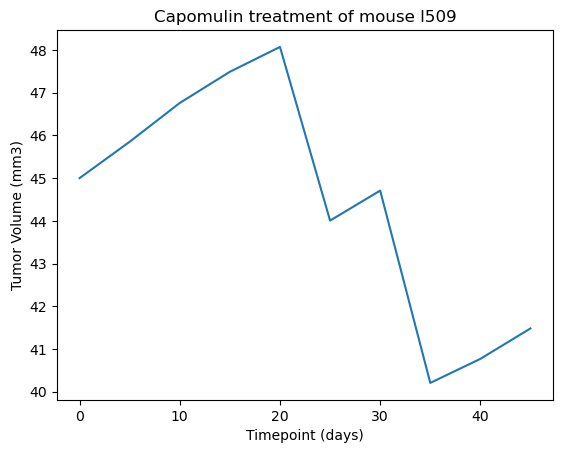

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


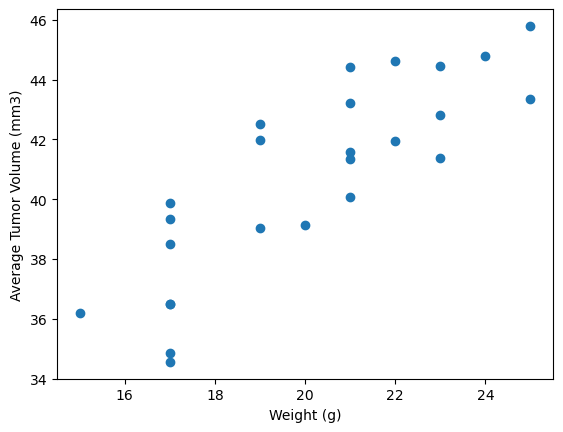

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


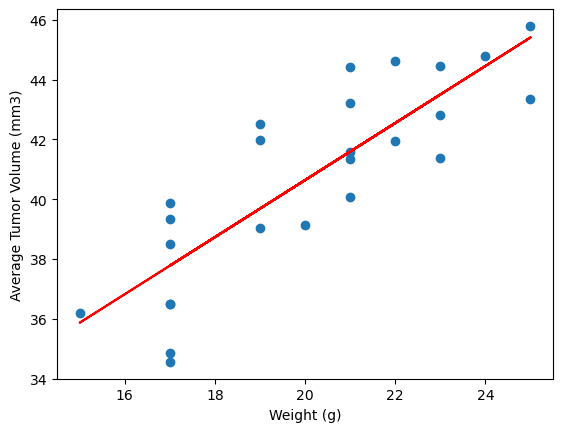

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
